In [1]:
import math
import os
os.chdir(r'C:\Users\Ram Kumar R S\Downloads\SoSe 2020\plab_files')
import fastatools


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
import numpy as np
import itertools

# 1.(20pts) k-mer distributions

## (a)(5pts) function kmer_frequencies(seqs,k)

In [2]:
def kmer_frequencies(seqs,k):
    """takes a list of sequences and produces kmer count in a single dict"""
    kmers_dict={}

    for kmer in itertools.product('ACGT',repeat=k):
         kmer = ''.join(kmer) # make str from tuple
         kmers_dict[kmer]=1

    for seq in seqs:
         #print(seq)
         for i in range(len(seq)-k+1):
             kmer=seq[i:i+k]
             kmers_dict[kmer] += 1 
    return kmers_dict

In [3]:
seq=["ACGTATAC"]
kmer_2=kmer_frequencies(seq,2)
kmer_2

{'AA': 1,
 'AC': 3,
 'AG': 1,
 'AT': 2,
 'CA': 1,
 'CC': 1,
 'CG': 2,
 'CT': 1,
 'GA': 1,
 'GC': 1,
 'GG': 1,
 'GT': 2,
 'TA': 3,
 'TC': 1,
 'TG': 1,
 'TT': 1}

In [4]:
kmer_3=kmer_frequencies(seq, 3)
#kmer_3

In [5]:
def background_frequency(seq):
    return kmer_frequencies(seq,k=1)

In [6]:
background_freq=background_frequency(seq)
background_freq

{'A': 4, 'C': 3, 'G': 2, 'T': 3}

In [7]:
def observed_frequency(kmer_freq):
    return {k:(v)/(sum(kmer_freq.values())) for k,v in kmer_freq.items()}

In [8]:
obs=observed_frequency(kmer_2)
obs

{'AA': 0.043478260869565216,
 'AC': 0.13043478260869565,
 'AG': 0.043478260869565216,
 'AT': 0.08695652173913043,
 'CA': 0.043478260869565216,
 'CC': 0.043478260869565216,
 'CG': 0.08695652173913043,
 'CT': 0.043478260869565216,
 'GA': 0.043478260869565216,
 'GC': 0.043478260869565216,
 'GG': 0.043478260869565216,
 'GT': 0.08695652173913043,
 'TA': 0.13043478260869565,
 'TC': 0.043478260869565216,
 'TG': 0.043478260869565216,
 'TT': 0.043478260869565216}

In [9]:
"""def expected_frequency(kmer):        # not required and hence to be removed
    d={}
    for k,v in kmer.items():
        kmer_len=(len(k)) #length of kmer
        val=[]
        i=0
        while i < kmer_len:

            val.append(background_freq[k[i]]/sum(background_freq.values()))
            i=i+1
        d[k]=np.prod(val)
    return d
    
expected_frequency(kmer_2)"""

'def expected_frequency(kmer):        # not required and hence to be removed\n    d={}\n    for k,v in kmer.items():\n        kmer_len=(len(k)) #length of kmer\n        val=[]\n        i=0\n        while i < kmer_len:\n\n            val.append(background_freq[k[i]]/sum(background_freq.values()))\n            i=i+1\n        d[k]=np.prod(val)\n    return d\n    \nexpected_frequency(kmer_2)'

## b) functionlog_odds_ratio(observed,backgroundfreq)  


In [10]:
def log_odds_ratio(observed,background):
    exp_frequency={}              # exp_frequency is holding expected frequency dict
    for k,v in observed.items():
        x=(len(k)) #length of kmer
        val=[]
        i=0
        while i<x:

            val.append(background[k[i]]/sum(background.values()))
            i=i+1
        exp_frequency[k]=np.prod(val)
    
    return {k:math.log2((observed[k] / exp_frequency[k])) for k,v in observed.items() } 

In [11]:
log_odds_ratio(obs,background_freq)

{'AA': -1.3536369546147005,
 'AC': 0.6463630453852995,
 'AG': -0.35363695461470046,
 'AT': 0.061400544664143276,
 'CA': -0.9385994553358568,
 'CC': -0.523561956057013,
 'CG': 1.0614005446641432,
 'CT': -0.523561956057013,
 'GA': -0.35363695461470046,
 'GC': 0.061400544664143276,
 'GG': 0.6463630453852995,
 'GT': 1.0614005446641432,
 'TA': 0.6463630453852995,
 'TC': -0.523561956057013,
 'TG': 0.061400544664143276,
 'TT': -0.523561956057013}

## c) given data sensitive and insensitive sequences

In [12]:
f=open("exosome-sensitive.fa",'r')
exo_sensitive=dict(fastatools.fasta_sequences(f))
exo_sensitive_seq= "".join(exo_sensitive.values())                              # sensitive sequences
#background_freq_sensitive=background_frequency(exo_sensitive_seq)
#background_freq_sensitive

In [13]:
f=open("exosome-insensitive.fa",'r')
exo_insensitive=dict(fastatools.fasta_sequences(f))
exo_insensitive_seq= "".join(exo_insensitive.values())
                                                                            # insensitive sequences
#background_freq_insensitive=background_frequency(exo_insensitive_seq)
#background_freq_insensitive

i.The background frequencies of the nucleotides using the combined set of sequences.

In [14]:
combined_seq=exo_sensitive_seq+exo_insensitive_seq
background_freq_combined=background_frequency(combined_seq)      # overall sequence
background_freq_combined

{'A': 215658, 'C': 265430, 'G': 287485, 'T': 231431}

1. ii.The observed frequencies of k-mers for a)the sensitive sequences and b)the insen-sitive sequences
2. iii.Using the common background frequency calculate thelog -odds ratio for the set of sensitive and insensitve sequences

In [15]:
kmer2_sensitive=kmer_frequencies(exo_sensitive.values(), 2)       #.value() reprsents list of sequences
kmer3_sensitive=kmer_frequencies(exo_sensitive.values(), 3)
kmer4_sensitive=kmer_frequencies(exo_sensitive.values(), 4)    # kmer frequencies  sensitive sequence


In [16]:
obs_kmer2_sens=observed_frequency(kmer2_sensitive)
obs_kmer3_sens=observed_frequency(kmer3_sensitive)          # observed frequencies sensitive sequence
obs_kmer4_sens=observed_frequency(kmer4_sensitive)



In [17]:
kmer2_sens_log_ratio=log_odds_ratio(obs_kmer2_sens,background_freq_combined)
kmer3_sens_log_ratio=log_odds_ratio(obs_kmer3_sens,background_freq_combined)       # log odd ratio of sensitive seq
kmer4_sens_log_ratio=log_odds_ratio(obs_kmer4_sens,background_freq_combined)


In [18]:
kmer2_insensitive=kmer_frequencies(exo_insensitive.values(), 2)
kmer3_insensitive=kmer_frequencies(exo_insensitive.values(), 3)          # kmer freq of insensitive seq
kmer4_insensitive=kmer_frequencies(exo_insensitive.values(), 4)


In [19]:
obs_kmer2_insens=observed_frequency(kmer2_insensitive)
obs_kmer3_insens=observed_frequency(kmer3_insensitive)     # observed freq of insensitive seq
obs_kmer4_insens=observed_frequency(kmer4_insensitive)



In [20]:
kmer2_insens_log_ratio=log_odds_ratio(obs_kmer2_insens,background_freq_combined)
kmer3_insens_log_ratio=log_odds_ratio(obs_kmer3_insens,background_freq_combined)  # log odd ratio of insensitive seq
kmer4_insens_log_ratio=log_odds_ratio(obs_kmer4_insens,background_freq_combined)



### d. discrimination of kmer composition

In [21]:
def difference(sensitive,insensitive):                                        # calculating difference
    return {k:(sensitive[k]-insensitive[k]) for k,v in sensitive.items()}
difference(kmer2_sens_log_ratio,kmer2_insens_log_ratio)

{'AA': 0.7500729882522265,
 'AC': 0.23841511308994728,
 'AG': 0.006593421260580823,
 'AT': 0.6094549759319928,
 'CA': 0.2190485666321651,
 'CC': -0.3336791005797199,
 'CG': -0.6360945820846531,
 'CT': -0.041860350435746846,
 'GA': -0.005885890017173005,
 'GC': -0.4194398310245864,
 'GG': -0.468150137457879,
 'GT': -0.02645097658799994,
 'TA': 0.6481121620555476,
 'TC': -0.013736042250372199,
 'TG': -0.03280223512280575,
 'TT': 0.44798525088687946}

In [22]:
def ratio(sensitive,insensitive):                                               # calculating ratio
    return {k:(sensitive[k]/insensitive[k]) for k,v in sensitive.items()}
ratio(kmer2_sens_log_ratio,kmer2_insens_log_ratio)

{'AA': -9.10999749079985,
 'AC': 0.5201866228001213,
 'AG': 1.0344232288754145,
 'AT': 0.006575967593710864,
 'CA': -1.2397165662318006,
 'CC': 0.2266243183581154,
 'CG': 3.2440098950169083,
 'CT': 0.8155289787501507,
 'GA': 6.750130338944489,
 'GC': -0.9001957975250673,
 'GG': -0.10227688336295633,
 'GT': 1.0799183545476339,
 'TA': 0.19066319340666496,
 'TC': 1.196351814146729,
 'TG': 0.5733201353016544,
 'TT': 6.452088354287652}

Inference:
    On observing the discriminatory values between ratio method and difference method, **the difference method** seems to be correct.
    Hence, the discriminatory values are calculated using ratio method as shown below:


In [23]:
kmer2_dv=difference(kmer2_sens_log_ratio,kmer2_insens_log_ratio)
kmer3_dv=difference(kmer3_sens_log_ratio,kmer3_insens_log_ratio)
kmer4_dv=difference(kmer4_sens_log_ratio,kmer4_insens_log_ratio)



### e. Sorting and plotting

In [24]:
Top_kmers2 =[(k,v) for k, v in sorted(kmer2_dv.items(),key=lambda item: item[1])]   # lowest to highest
print("The 16 kmers with lowest score are as follows:")
Top_kmers2[:16]

The 16 kmers with lowest score are as follows:


[('CG', -0.6360945820846531),
 ('GG', -0.468150137457879),
 ('GC', -0.4194398310245864),
 ('CC', -0.3336791005797199),
 ('CT', -0.041860350435746846),
 ('TG', -0.03280223512280575),
 ('GT', -0.02645097658799994),
 ('TC', -0.013736042250372199),
 ('GA', -0.005885890017173005),
 ('AG', 0.006593421260580823),
 ('CA', 0.2190485666321651),
 ('AC', 0.23841511308994728),
 ('TT', 0.44798525088687946),
 ('AT', 0.6094549759319928),
 ('TA', 0.6481121620555476),
 ('AA', 0.7500729882522265)]

In [25]:
Top_kmers3 =[(k,v) for k, v in sorted(kmer3_dv.items(),key=lambda item: item[1])]   # lowest to highest
print("The 16 kmers with lowest score are as follows:")
Top_kmers3[:16]

The 16 kmers with lowest score are as follows:


[('CGG', -0.846207896680949),
 ('CCG', -0.8105811070849261),
 ('GCG', -0.7799437283006175),
 ('CGC', -0.6805038146343138),
 ('GGG', -0.6470314116566642),
 ('GGC', -0.5616586159645726),
 ('GCC', -0.5076775154254897),
 ('CCC', -0.4464811757702458),
 ('CGA', -0.3843544952768032),
 ('TCG', -0.3382689670651443),
 ('GGT', -0.3021158038512952),
 ('CGT', -0.300305283187567),
 ('GAG', -0.26859736113736005),
 ('GTC', -0.2454250062404154),
 ('GCT', -0.23007524955108494),
 ('GGA', -0.22900988236564898)]

In [26]:
Top_kmers4 =[(k,v) for k, v in sorted(kmer4_dv.items(),key=lambda item: item[1])]   # lowest to highest
print("The 16 kmers with lowest score are as follows:")
Top_kmers4[:16]

The 16 kmers with lowest score are as follows:


[('CGGC', -1.1007777700898767),
 ('GCCG', -1.0741279580769074),
 ('GCGG', -1.0479231026167495),
 ('CCGC', -0.9633691281565733),
 ('CCGG', -0.8976665828088972),
 ('GGGG', -0.8692291804153448),
 ('CGGG', -0.8665550811450025),
 ('GGCG', -0.8658747007642125),
 ('AGCG', -0.8149307929980096),
 ('GGGC', -0.8088434042325021),
 ('CGCG', -0.8057164266618502),
 ('GCGC', -0.7502903836091304),
 ('CCCG', -0.7271553736507508),
 ('GGCC', -0.7265387120842852),
 ('CGCC', -0.7263345827309682),
 ('GCCC', -0.7038371512624682)]

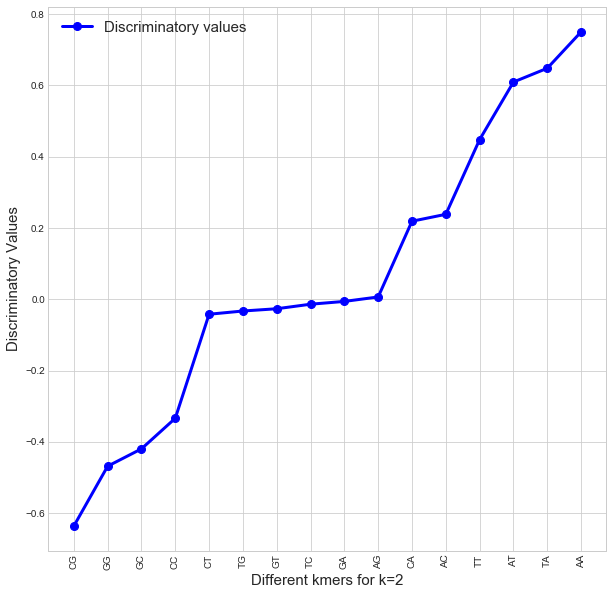

In [27]:
rcParams['figure.figsize'] = 10, 10

plt.plot([i[0] for i in Top_kmers2],[i[1] for i in Top_kmers2],"bo-",color='blue',linewidth=3,markersize=8,
        label='Discriminatory values')
plt.xticks(rotation=90)
plt.legend(shadow="True")
plt.legend(loc=2, prop={'size': 15})

plt.xlabel("Different kmers for k=2",fontsize=15,family="Arial")
plt.ylabel("Discriminatory Values",fontsize=15,family="Arial")
plt.show();

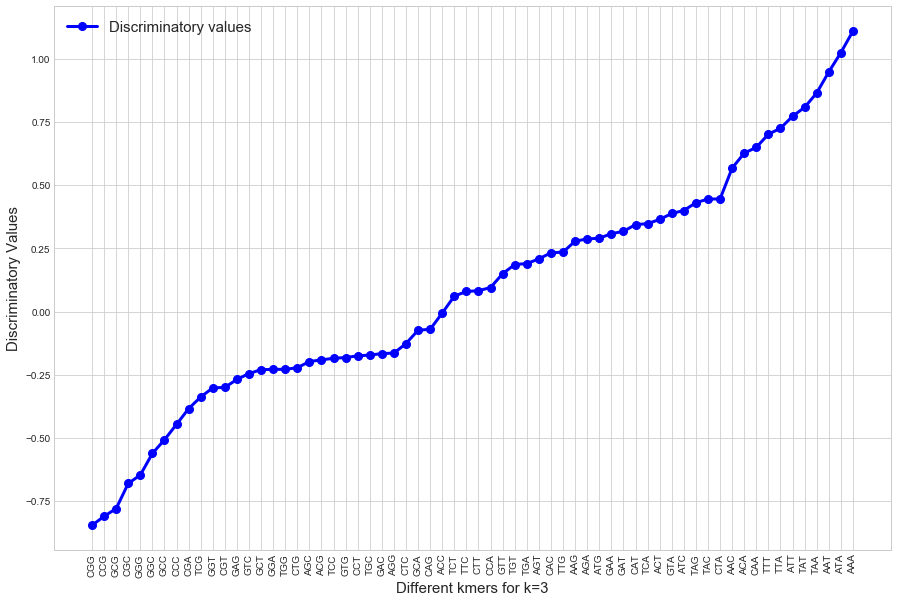

In [28]:
rcParams['figure.figsize'] = 15, 10

plt.plot([i[0] for i in Top_kmers3],[i[1] for i in Top_kmers3],"bo-",color='blue',linewidth=3,markersize=8,
        label='Discriminatory values')
plt.xticks(rotation=90)
plt.legend(shadow="True")
plt.legend(loc=2, prop={'size': 15})

plt.xlabel("Different kmers for k=3",fontsize=15,family="Arial")
plt.ylabel("Discriminatory Values",fontsize=15,family="Arial")
plt.show();

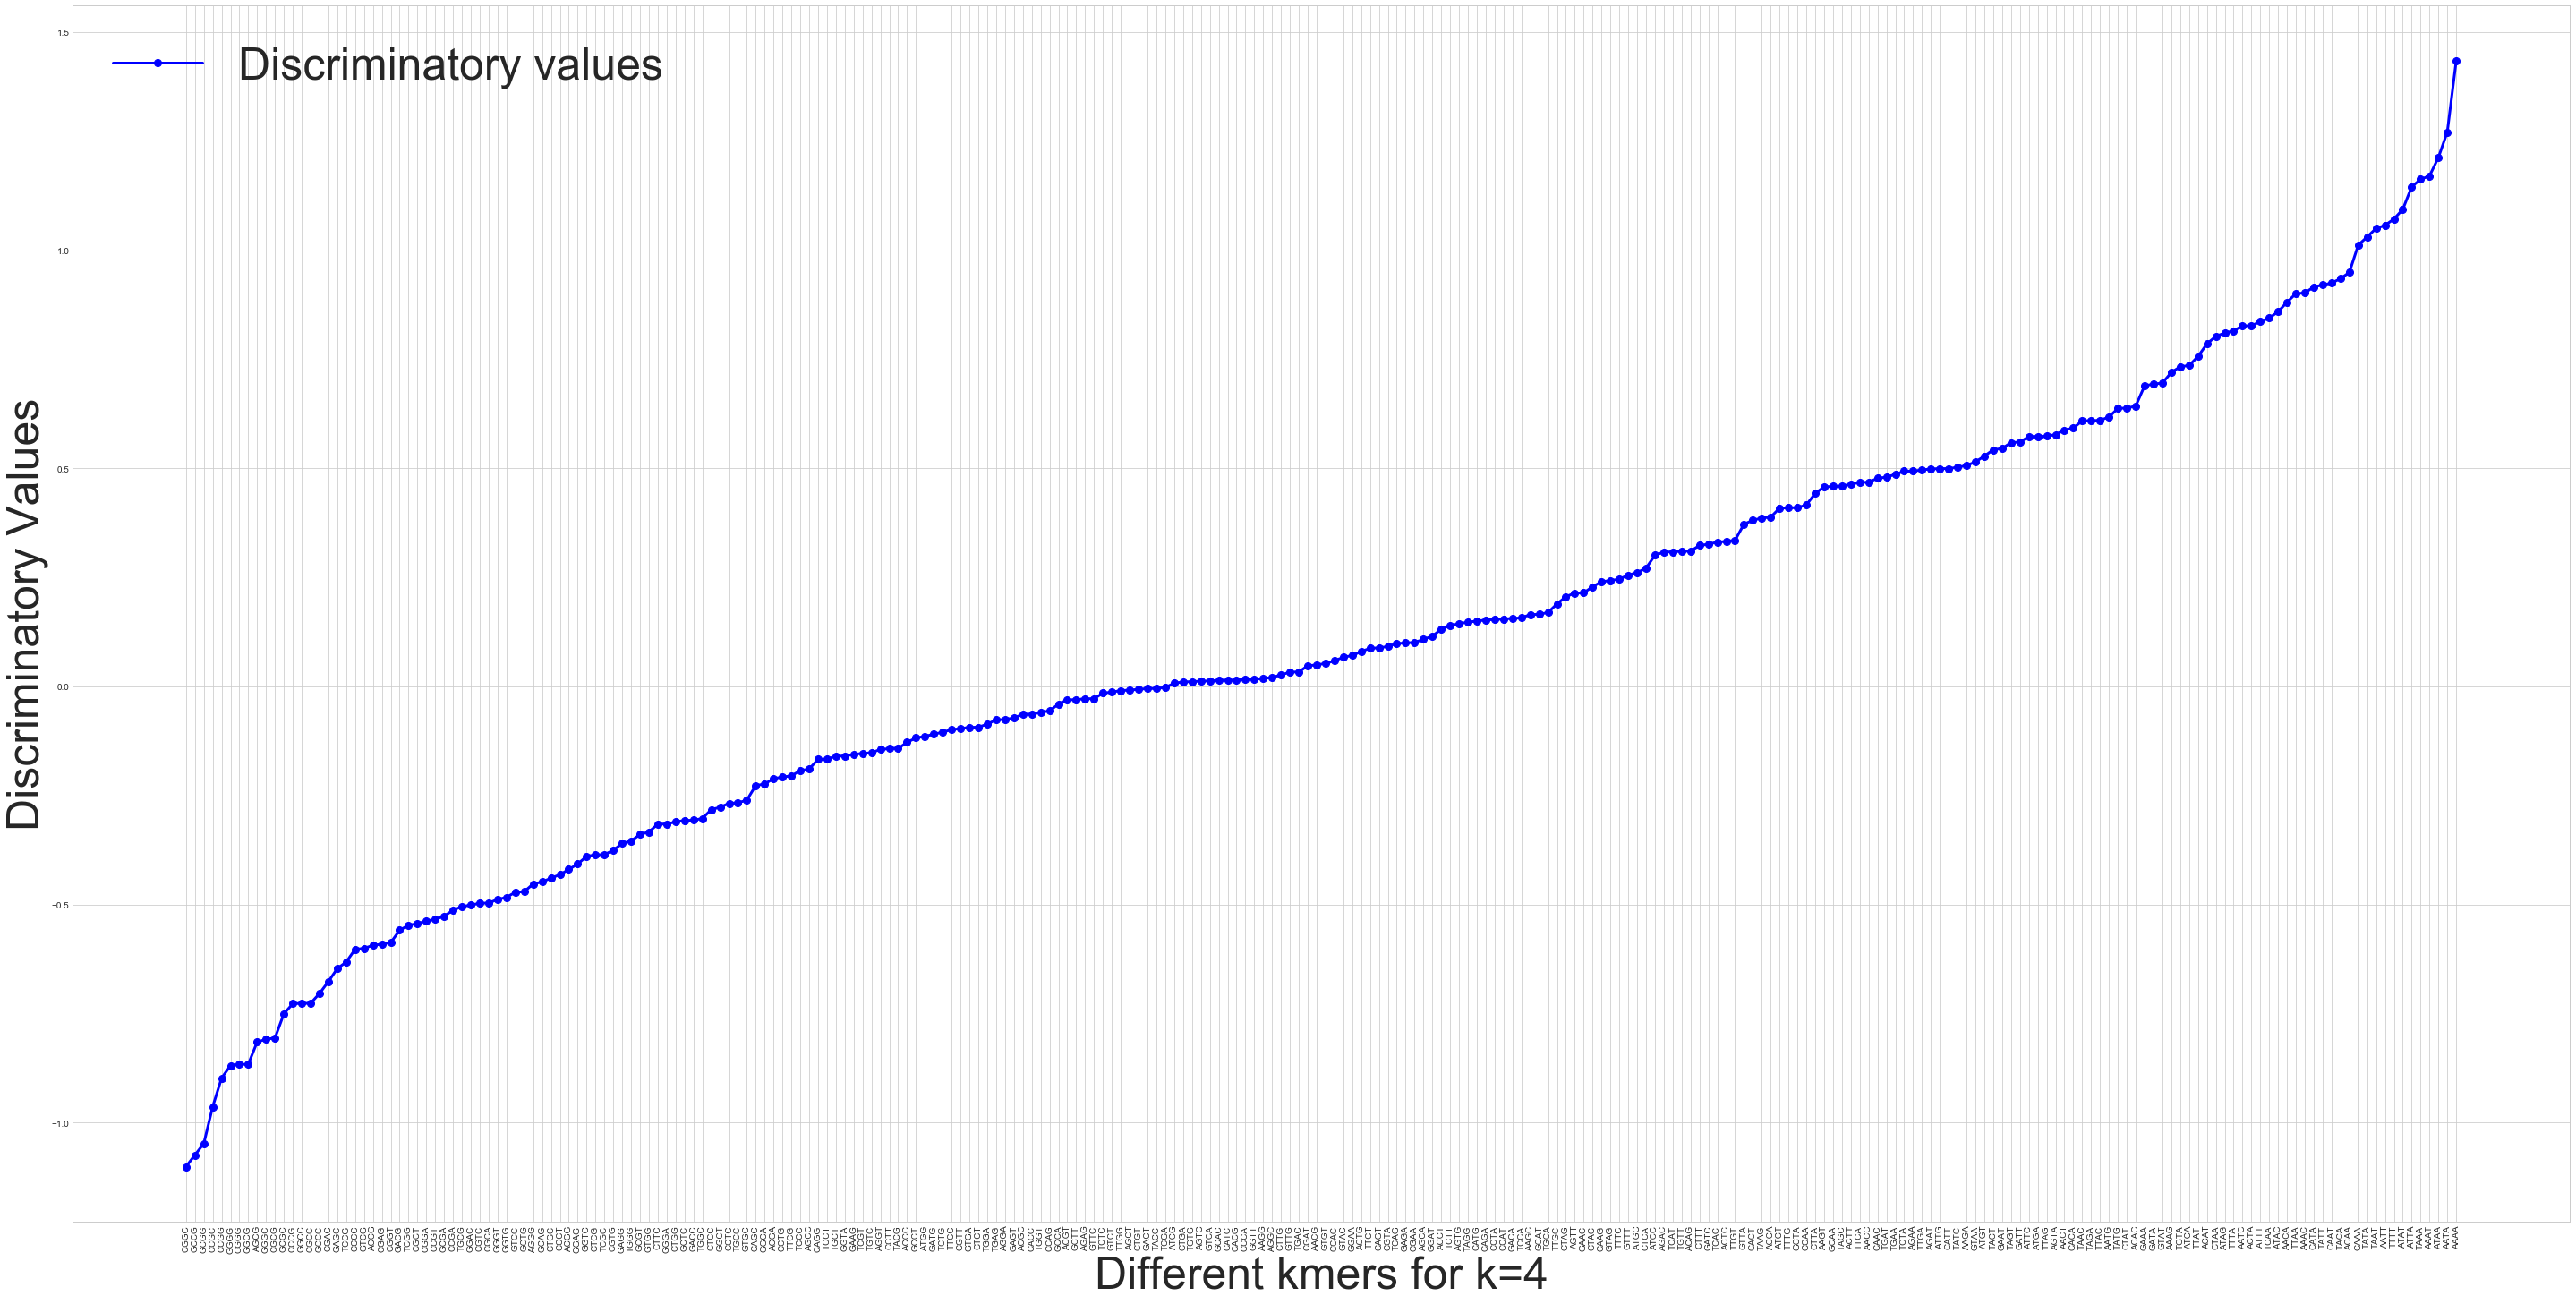

In [29]:
rcParams['figure.figsize'] = 50, 25

plt.plot([i[0] for i in Top_kmers4],[i[1] for i in Top_kmers4],"bo-",color='blue',linewidth=3,markersize=8,
        label='Discriminatory values')
plt.xticks(rotation=90)
plt.legend(shadow="True")
plt.legend(loc=2, prop={'size': 50})

plt.xlabel("Different kmers for k=4",fontsize=50,family="Arial")
plt.ylabel("Discriminatory Values",fontsize=50,family="Arial")
plt.show();

In [30]:
#dict.fromkeys(['a','ab'],1)